PHYS667 HW1 Extra Credit \
Jon Clifford

# **Problem 1.**

First, the imports

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
from scipy.optimize import minimize
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Now we get the data together--I accidentily typed the entire data table.  Note for problem 1, we exclude the first 5 datapoints, while for problem 2 we use all datapoints.  We will always exclude sigx and pxy.

(0, 300)

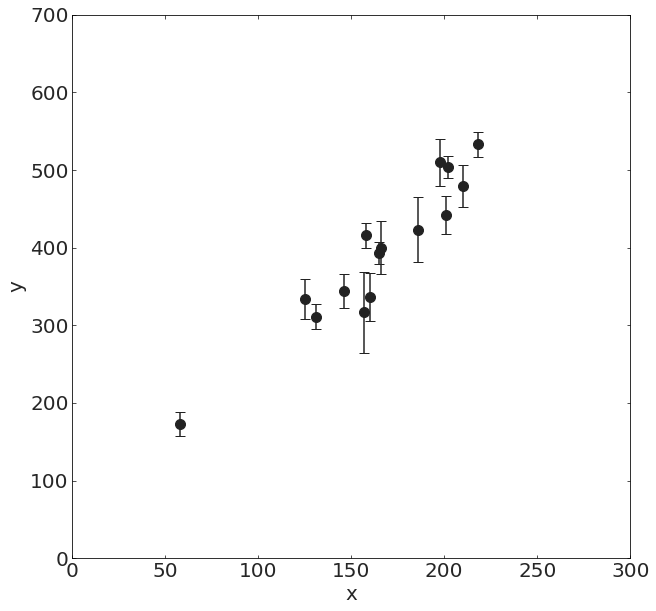

In [11]:
# our data table:
dat = pd.DataFrame(data={"x":[201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146],
                   "y":[592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344],
                   "sigy":[61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22],
                   "sigx":[9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5],
                   "pxy":[-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73,
                          -0.52, 0.90, 0.40, -0.78, -0.56]
                   })

# creating our error plot with the appropriate limits:
pl.errorbar(dat["x"].iloc[5:], dat["y"][5:], yerr=dat["sigy"][5:], capsize=5, fmt='.', ms=20)
pl.xlabel('x')
pl.ylabel('y')
pl.ylim([0, 700])
pl.xlim([0, 300])

And now we do our minimization, using a chi-squared objective function.

In [12]:
x = dat["x"].iloc[5:].values   # x-values we use
y = dat["y"].iloc[5:].values   # y-values we use
yerr=dat["sigy"].iloc[5:].values   # std values we'll use

def line(x, intercept, slope):
    return slope*x + intercept

def x2(args, x, y, yerr):   # defining the X^2 objective function
  a, b = args
  return sum((line(x, a, b) - y)**2 / yerr**2)

initialGuess = (10, 1) 

x2Solution = minimize(x2, initialGuess, args=(x, y, yerr))   # doing the minimization
sol = x2Solution.x
print("Our parameters are: %f intercept, %f slope" % (sol[0], sol[1]))

Our parameters are: 34.845957 intercept, 2.232536 slope


Now let's plot our solution:

(0, 300)

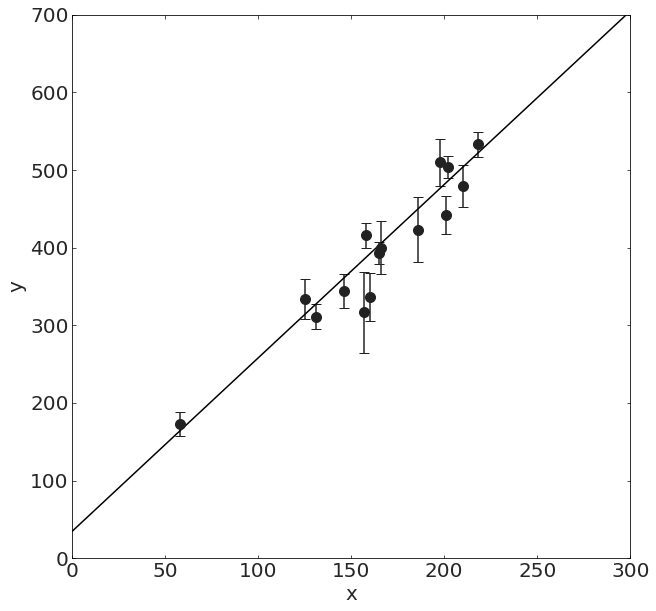

In [13]:
pl.errorbar(dat["x"].iloc[5:], dat["y"][5:], yerr=dat["sigy"][5:], capsize=5, fmt='.', ms=20)
pl.plot(np.linspace(0, 300, 5), sol[0] + sol[1]*np.linspace(0, 300, 5), c='k')
pl.xlabel('x')
pl.ylabel('y')
pl.ylim([0, 700])
pl.xlim([0, 300])

Figure 1: $\chi^2$ fit of the supplied data table, excluding the first 5 datapoints.

Plotting the results gives us the exact result shown in the paper.  Results look OK overall.

I didn't know how to find the standard uncertainty variance $\sigma_m^2$ of the slope, so I'll go to office hours to ask about that.

# **Problem 2.**

Same as Problem 1, except we include all of the values.  We'll do everything in one go, then show the plot below.

[213.27347362   1.07674761]


(0, 300)

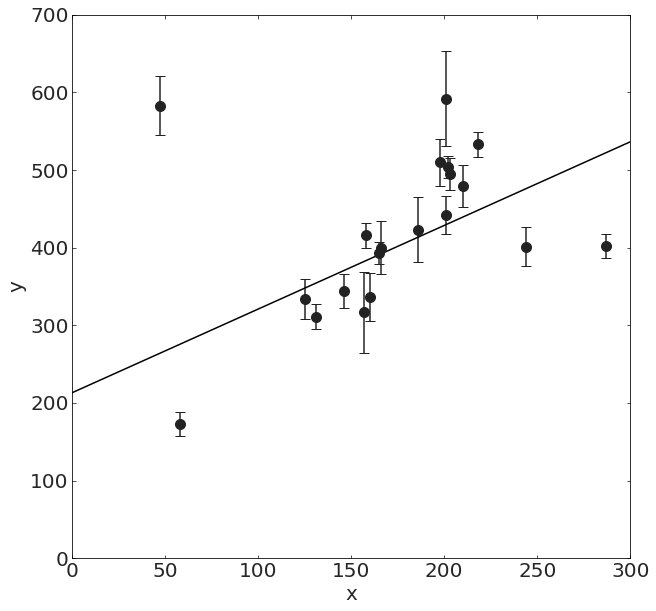

In [14]:
x = dat["x"].values   # x-values we use
y = dat["y"].values   # y-values we use
yerr=dat["sigy"].values   # std values we'll use

def line(x, intercept, slope):
    return slope*x + intercept

def x2(args, x, y, yerr):   # defining the X^2 objective function
  a, b = args
  return sum((line(x, a, b) - y)**2 / yerr**2)

initialGuess = (10, 1) 

x2Solution = minimize(x2, initialGuess, args=(x, y, yerr))   # doing the minimization
sol = x2Solution.x
print(sol)
pl.errorbar(dat["x"], dat["y"], yerr=dat["sigy"], capsize=5, fmt='.', ms=20)
pl.plot(np.linspace(0, 300, 5), sol[0] + sol[1]*np.linspace(0, 300, 5), c='k')
pl.xlabel('x')
pl.ylabel('y')
pl.ylim([0, 700])
pl.xlim([0, 300])

Figure 2: $\chi^2$ fit of the data table, using all datapoints.

I definitely don't like that there are pretty big outliers in the data.

# **Problem 3.**

Now we'll do the same things we did in Problem 1, except extending our fit to be a quadratic equation.  Everything else will be the same, except that we're finding 3 parameters instead of 2. 

In [15]:
x = dat["x"].iloc[5:].values   # x-values we use
y = dat["y"].iloc[5:].values   # y-values we use
yerr=dat["sigy"].iloc[5:].values   # std values we'll use

def quad(x, intercept, slope, slope2):
    return slope2*x**2 + slope*x + intercept

def x2(args, x, y, yerr):   # defining the X^2 objective function
  a, b, c = args
  return sum((quad(x, a, b, c) - y)**2 / yerr**2)

initialGuess = (10, 10, 1) 

x2Solution = minimize(x2, initialGuess, args=(x, y, yerr))   # doing the minimization
sol = x2Solution.x
print("Our parameters are: %f intercept, %f linear term, %f quadratic term" % (sol[0], sol[1], sol[2]))

Our parameters are: 72.557966 intercept, 1.604839 linear term, 0.002253 quadratic term


Then, we plot:

(0, 300)

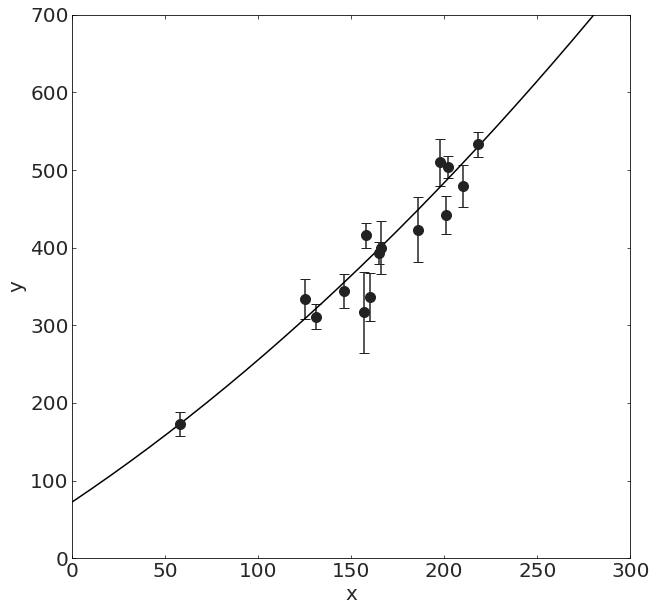

In [16]:
pl.errorbar(dat["x"].iloc[5:], dat["y"][5:], yerr=dat["sigy"][5:], capsize=5, fmt='.', ms=20)
pl.plot(np.linspace(0, 300, 30), sol[0] + sol[1]*np.linspace(0, 300, 30) + sol[2]*np.linspace(0, 300, 30)**2, c='k')
pl.xlabel('x')
pl.ylabel('y')
pl.ylim([0, 700])
pl.xlim([0, 300])

Figure 3: Quadratic fit of the data table, excluding the first 5 points.

Our fit doesn't look bad at all!